# **Homework 1 - Image Colorization**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Homeworks</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://learnopencv.com/wp-content/uploads/2018/07/colorization-example.png" alt="1" border="0">

This notebook contains the required task for the **first homework** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.

# **Task Description**

`Image Colorization` is the process of converting a grayscale image (single-channel) into an image with a specific color spectrum. In this homework, your task is to **create and train a convolutional neural network (CNN) model** to colorize grayscale images to the RGB color spectrum. To demonstrate the effectiveness of CNNs, you will also implement a **linear regression model** for the same task and compare their results.

## **Expectations**

- The **performance does not need to be perfect**, but your **metrics should show better results than random color guessing**, and the **loss should decrease throughout the epochs**.
- You are **free to design any custom shallow convolutional neural network**, as long as it is specifically tailored for the image colorization task.
- You can choose **any dataset** (e.g., `CIFAR-10`, `Caltech101`, `Food101`, `FlickR`) or create a custom dataset by **scraping the web** for a specific theme. If you decide to use web scraping, you can utilize the `icrawler` Python package. Ensure that **no NSFW images** are included.
- If you decide to use a **high-resolution dataset**, apply **resizizing transformations** since the fully connected network’s complexity increases with input size. For example:
  - A $[1\times32\times32]$ grayscale image will have $1,024$ features.
  - A $[1\times512\times512]$ grayscale image will have $262,144$ features, which is $256$ **times more**.
  
## **Requirements**

- Data Visualization:
  - Display **samples from the original dataset**.
  - Show the **transformed grayscale images** at the beginning of the notebook.
  - Present **predicted colorized images** alongside ground truth images.

- Performance Monitoring:
  - **Visualize training and validation losses** after training the network.
  - **Use plots and metrics (e.g., matplotlib, seaborn)** to display performance trends.

- Implement **overfitting prevention techniques**, such as:
  - **Early stopping**
  - **Regularization techniques**
  - **Experimenting with different loss functions**
  - Save the **best-performing model** during training.

- Compare model performance:
  - **Visualize predictions** on a batch of test images.
  - Calculate and display **batch losses for both FCN and CNN models**.
  - Explain why the models perform as they do, **highlighting the strengths and weaknesses** of each approach.

- Visualizing:
  - **Feature Maps** of the CNN model
  - **Weights** of the FCN model

- Optionally, use **WandB (Weights and Biases)** or **TensorBoard** to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.

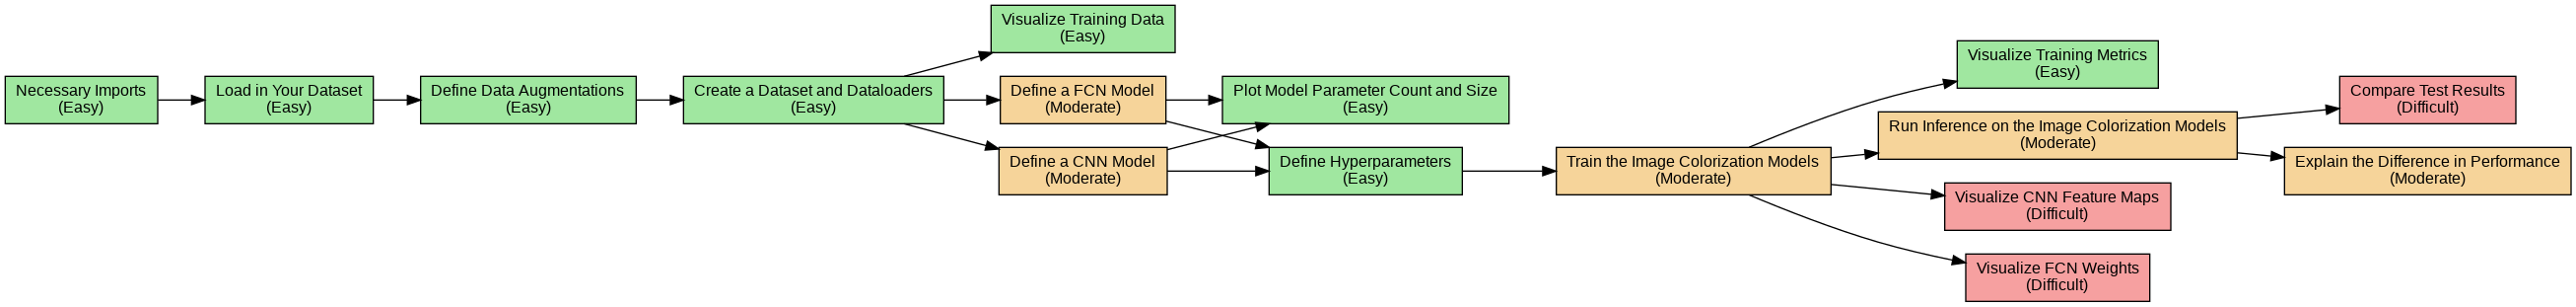

In [ ]:
# @title Image Colorization Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')
    dot.node('LoadData', 'Load in Your Dataset\n(Easy)', fillcolor='#A0E7A0')
    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Easy)', fillcolor='#A0E7A0')
    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')
    dot.node('CreateCNN', 'Define a CNN Model\n(Moderate)', fillcolor='#F6D49A')
    dot.node('CreateFCN', 'Define a FCN Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TorchSummary', 'Plot Model Parameter Count and Size\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Hyperparameters', 'Define Hyperparameters\n(Easy)', fillcolor='#A0E7A0')

    dot.node('TrainModel', 'Train the Image Colorization Models\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')

    dot.node('RunInference', 'Run Inference on the Image Colorization Models\n(Moderate)', fillcolor='#F6D49A')

    dot.node('CompareResults', 'Compare Test Results\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('ExplainResults', 'Explain the Difference in Performance\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeFM', 'Visualize CNN Feature Maps\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('VisualizeW', 'Visualize FCN Weights\n(Difficult)', fillcolor='#F6A0A0')

    # Edges
    dot.edge('Imports', 'LoadData')
    dot.edge('LoadData', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')
    dot.edge('DatasetDataloader', 'CreateCNN')
    dot.edge('DatasetDataloader', 'VisualizeSample')
    dot.edge('DatasetDataloader', 'CreateFCN')

    dot.edge('CreateCNN', 'TorchSummary')
    dot.edge('CreateFCN', 'TorchSummary')
    dot.edge('CreateCNN', 'Hyperparameters')

    dot.edge('CreateFCN', 'Hyperparameters')
    dot.edge('Hyperparameters', 'TrainModel')

    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'RunInference')
    dot.edge('TrainModel', 'VisualizeFM')
    dot.edge('TrainModel', 'VisualizeW')
    dot.edge('RunInference', 'CompareResults')
    dot.edge('RunInference', 'ExplainResults')

    dot.render(output_filename, view=False)

create_flowchart('homework1_flowchart')
IMG('homework1_flowchart.png')

Each section of the Notebook will guide you through the task:
- `necessary imports`
- `data loading process`
- `defining data augmentations`
- `creating a dataset and dataloaders`
- `visualizing the training data`
- `creating a CNN model`
- `creating a FCN model`
- `defining a loss function and an optimizer`
- `creating a training and validation loop`
- `testing the models`
- `comparing results`
- `visualizing weights and feature maps`


## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
from torch.utils.data import Dataset, DataLoader, random_split
import copy
import time


device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

## **1. Data Loading Process**

If you're unsure which dataset to use, **PyTorch** provides a collection of **pre-built datasets** in its [documentation](https://pytorch.org/vision/main/datasets.html). Look for a dataset under the *Image Classification* section that contains colored images.

**Caltech-101:**

<img src=" https://datasets.activeloop.ai/wp-content/uploads/2022/09/Caltech-101-dataset-main-image.webp" alt="1" border="0">

**CIFAR-10:**

<img src=" https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-10-dataset-Activeloop-Platform-visualization-image-1.webp" alt="1" border="0">

**Food-101:**

<img src=" https://storage.googleapis.com/kaggle-datasets-images/2918922/5029790/277a9147ec4854e4762767c8bd107bec/dataset-card.png?t=2023-02-20-08-37-14" alt="1" border="0">




In [2]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True)

print("Number of training images:", len(train_dataset))
print("Number of test images:", len(test_dataset))


100%|██████████| 170M/170M [00:03<00:00, 48.8MB/s]


Number of training images: 50000
Number of test images: 10000


## **2. Defining Augmentations**

Since most datasets and images are in RGB color space, you'll need to convert them to grayscale. However, we **strongly recommend** against applying the grayscale transformation immediately after loading the dataset, as this would result in losing the original colored images (which serve as the target). Instead, apply essential preprocessing steps like `tensor conversion`, `normalization` and `resizing` first, and **only perform the grayscale transformation within the custom Dataset class** to retain access to both input (grayscale) and target (RGB) images.

```python
train_transforms = transforms.Compose([
            # Add Augmentations
])

test_transforms = transforms.Compose([
            # Add Augmentations
])
```

In [3]:
train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])


## **3. Creating Datasets and Dataloaders**

To train a custom object detection model, a dataset is required. For this assignment, you will create a **custom dataset class** that takes a dataset path as input and returns **input-output** image pairs when batched through a `Dataloader`:

- **Input:** $[1\times H \times W]$ grayscale image  
- **Output:** $[3\times H \times W]$ RGB image  

Use the built-in **`transforms.Grayscale`** method from `torchvision.transforms` to convert images to grayscale.

> **Note:** The $W$ and $H$ dimensions do not necessarily have to be the same.

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

```python
class GrayscaleToColorDataset(Dataset):
    def __init__(self):
        raise NotImplementedError
    
    def __len__(self):
        raise NotImplementedError

    def __getitem__(self, idx):
        raise NotImplementedError
```

In [4]:
class GrayscaleToColorDataset(Dataset):
    def __init__(self, base_dataset, size=(128,128)):
        self.base = base_dataset
        self.size = size

        self.to_gray = transforms.Compose([
            transforms.Resize(self.size),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor()
        ])

        self.to_rgb = transforms.Compose([
            transforms.Resize(self.size),
            transforms.ToTensor()
        ])

    def __len__(self):
        return len(self.base)

    def __getitem__(self, idx):
        rgb_image, _ = self.base[idx]
        gray_image = self.to_gray(rgb_image)
        rgb_image = self.to_rgb(rgb_image)
        return gray_image, rgb_image


train_custom = GrayscaleToColorDataset(train_dataset, size=(128,128))
test_custom  = GrayscaleToColorDataset(test_dataset, size=(128,128))

train_len = int(0.8 * len(train_custom))
val_len   = len(train_custom) - train_len
train_ds, val_ds = random_split(train_custom, [train_len, val_len])

print("Train samples:", len(train_ds))
print("Validation samples:", len(val_ds))
print("Test samples:", len(test_custom))

batch_size = 32
num_workers = 4

train_loader = DataLoader(
    train_ds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True
)

val_loader = DataLoader(
    val_ds,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True
)

test_loader = DataLoader(
    test_custom,
    batch_size=batch_size,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True
)

gray_batch, rgb_batch = next(iter(train_loader))
print("Gray batch shape:", gray_batch.shape)
print("RGB batch shape:", rgb_batch.shape)


Train samples: 40000
Validation samples: 10000
Test samples: 10000
Gray batch shape: torch.Size([16, 1, 128, 128])
RGB batch shape: torch.Size([16, 3, 128, 128])


## **4.1 Visualize Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input-output** pairs using `Matplotlib` or `Seaborn`. Ensure that at least **8 pairs** are displayed for a clear representation.

```python
def visualize_batch():
  raise NotImplementedError
```

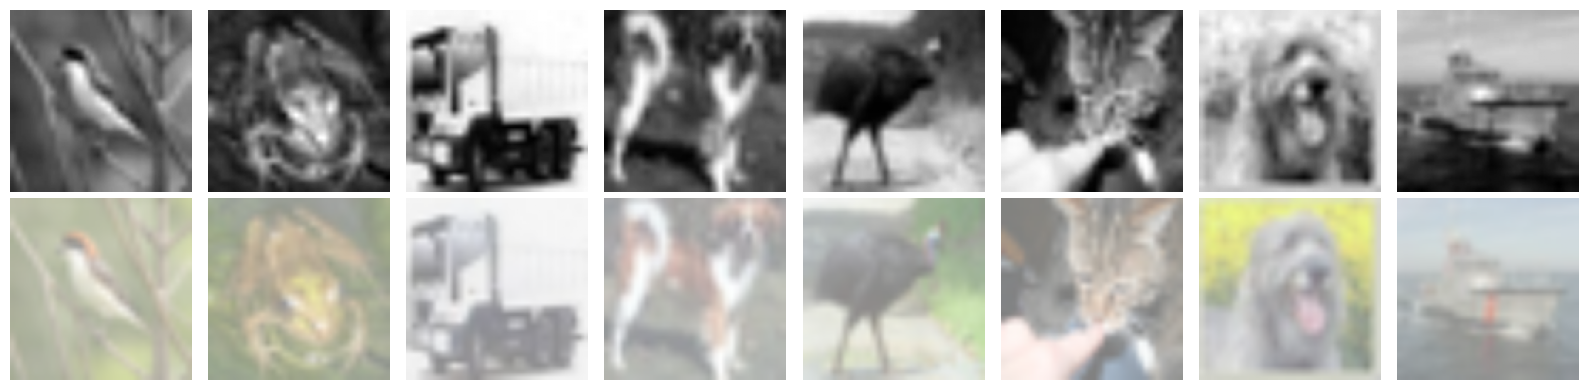

In [5]:
def visualize_batch(dataloader, num_images=8):
    gray_batch, rgb_batch = next(iter(dataloader))

    gray_batch = gray_batch.detach().cpu()
    rgb_batch = rgb_batch.detach().cpu()


    rgb_batch = (rgb_batch * 0.5) + 0.5
    gray_batch = (gray_batch * 0.5) + 0.5

    batch_size = gray_batch.size(0)
    n = min(num_images, batch_size)

    plt.figure(figsize=(16, 4))
    for i in range(n):

        plt.subplot(2, n, i + 1)
        plt.imshow(gray_batch[i][0], cmap='gray')
        if i == 0:
            plt.ylabel("Input Gray", fontsize=12)
        plt.axis('off')


        plt.subplot(2, n, n + i + 1)
        plt.imshow(rgb_batch[i].permute(1, 2, 0))
        if i == 0:
            plt.ylabel("Target RGB", fontsize=12)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_batch(train_loader)


## **4.2 Creating a CNN Model**

You are free to design your CNN using any combination of:
- `Conv2d` layers
- `MaxPool2d`
- Normalization techniques (e.g., `BatchNorm`, `Dropout`)
- Activation functions (e.g., `ReLU`, `LeakyReLU`, etc.)

The final convolutional layer should output a tensor of shape $[3 × H × W]$ to match the RGB color space. Apply a `sigmoid` activation at the end to constrain the output values between **0 and 1**, allowing for later **denormalization** to the full RGB scale.

For an **extra grade improvement**, explore more advanced architectures and techniques:

- **Dilation in Conv2D layers:** Expands the receptive field without increasing parameters.  
  [PyTorch Docs on Conv2D](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)  

- **Transpose Convolutions:** Used for upsampling to restore spatial dimensions in an image.  
  [PyTorch Docs on ConvTranspose2d](https://pytorch.org/docs/stable/generated/torch.nn.ConvTranspose2d.html)  

- **Encoder-Decoder Models & UNets:** Popular in segmentation and image-to-image translation tasks.  
  [Understanding UNet](https://towardsdatascience.com/understanding-u-net-61276b10f360/)  

- **Generative Adversarial Networks (GANs):** Used for high-quality image generation and colorization.  
  [Introduction to GANs](https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/)  

```python
class ColorizationCNN(nn.Module):
    def __init__(self):
        super(ColorizationCNN, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [6]:
class ColorizationCNN(nn.Module):
    def __init__(self):
        super(ColorizationCNN, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2)
        )
        self.enc3 = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2,2)
        )
        # Decoder
        self.dec1 = nn.Sequential(
            nn.ConvTranspose2d(256,128,kernel_size=2,stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        )
        self.dec2 = nn.Sequential(
            nn.ConvTranspose2d(128,64,kernel_size=2,stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.out_conv = nn.Conv2d(64,3,3,padding=1)
        self.out_act  = nn.Sigmoid()

    def forward(self,x):
        x = self.enc1(x)
        x = self.enc2(x)
        x = self.enc3(x)
        x = self.dec1(x)
        x = self.dec2(x)
        x = self.out_conv(x)
        x = self.out_act(x)
        return x

#model_cnn = ColorizationCNN().to(device)

## **4.3 Creating a FCN Model**

The fully connected network should process an **input grayscale image** and transform it into an RGB image by following these steps:

1. **Flatten the input:**  
   - Convert the image into a vector of shape $[N, 1 * H * W]$, where $N$ is the batch size.
   
2. **Linear Projection:**  
   - Apply a **fully connected (linear) layer** that projects the input vector to a space of $[N, 3 * H * W]$.

3. **Reshape the output:**  
   - Reshape the result back into an image format with shape $[N, 3, H, W]$, matching the expected RGB output.

Feel free to add **more hidden layers** and incorporate **non-linear activation functions**, normalization techniques, and other enhancements to help the model learn more expressive and complex features.

```python
class ColorizationLinear(nn.Module):
    def __init__(self):
        super(ColorizationLinear, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [7]:
class ColorizationLinear(nn.Module):
    def __init__(self, H=128, W=128, hidden_dim=4096):
        super(ColorizationLinear, self).__init__()
        self.H = H
        self.W = W
        input_dim = 1 * H * W
        output_dim = 3 * H * W

        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(inplace=True),
            nn.Linear(hidden_dim, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        B = x.size(0)
        x = x.view(B, -1)
        x = self.model(x)
        x = x.view(B, 3, self.H, self.W)
        return x

#fcn_model = ColorizationLinear(H=128, W=128, hidden_dim=4096).to(device)

## **5.1 Plotting Model Parameter Count and Size**

A convenient way to inspect the number of parameters in a defined `nn.Module` is by using the `torchsummary` package. This package provides a detailed summary of the model architecture, including the number of parameters in each layer, their shapes, and the total parameter count.

To use `torchsummary`, you need to pass a dummy tensor with the specified input shape. The package will then traverse the model, layer by layer, calculating the total number of trainable and non-trainable parameters while also displaying the output shapes at each stage.

Sumnmarize **both models**!

```python
model_cnn = ColorizationCNN().to(device)
summary(model_cnn, input_size = )
```

In [8]:
model_cnn = ColorizationCNN().to(device)
fcn_model = ColorizationLinear(H=128, W=128, hidden_dim=4096).to(device)  # move to device

from torchsummary import summary

print("===== CNN Model Summary =====")
summary(model_cnn, input_size=(1, 128, 128))

print("===== FCN Model Summary =====")
summary(fcn_model, input_size=(1, 128, 128))


===== CNN Model Summary =====
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]             640
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
            Conv2d-4        [-1, 128, 128, 128]          73,856
       BatchNorm2d-5        [-1, 128, 128, 128]             256
              ReLU-6        [-1, 128, 128, 128]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 256, 64, 64]         295,168
       BatchNorm2d-9          [-1, 256, 64, 64]             512
             ReLU-10          [-1, 256, 64, 64]               0
        MaxPool2d-11          [-1, 256, 32, 32]               0
  ConvTranspose2d-12          [-1, 128, 64, 64]         131,200
      BatchNorm2d-13          [-1, 128, 64, 64]             256
         

## **5.2 Defining Loss Function and Optimizer**

**Loss Functions and their options:**

For our grayscale-to-color image translation task, we are performing **regression** rather than classification. Our network predicts continuous RGB values for each pixel, meaning that the chosen loss function should effectively measure the difference between the predicted and true color values.

---

### **a. Mean Squared Error (MSE) Loss**
MSE loss is a standard choice for regression tasks as it penalizes larger errors more strongly than smaller ones. It is computed as:

$$
\mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

where $ y_i $ is the ground truth pixel value and $ \hat{y}_i $ is the predicted pixel value.

- **Pros:** Simple, commonly used for regression, computationally efficient.
- **Cons:** Sensitive to outliers since it squares errors.

---

### **b. Root Mean Squared Error (RMSE) Loss**
RMSE is simply the square root of MSE, reducing the impact of squared errors and providing a more interpretable loss value in the same unit as the output.

$$
\mathcal{L}_{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}
$$

- **Pros:** Less sensitive to large errors compared to MSE, more interpretable.
- **Cons:** Still punishes large errors significantly.

---

### **c. Huber Loss**
Huber Loss is a combination of MSE and Mean Absolute Error (MAE) that is more robust to outliers. It applies MSE for small errors and MAE for large ones:

$$
\mathcal{L}_{Huber} =
\begin{cases}
\frac{1}{2} (y_i - \hat{y}_i)^2, & \text{if} \ |y_i - \hat{y}_i| \leq \delta \\
\delta (|y_i - \hat{y}_i| - \frac{1}{2} \delta), & \text{otherwise}
\end{cases}
$$

where $ \delta $ is a threshold defining the transition from quadratic to linear loss.

- **Pros:** Robust to outliers while still penalizing significant errors.
- **Cons:** Introduces an extra hyperparameter $ \delta $ that must be tuned.

---

### **d. Structural Similarity Index (SSIM) Loss (Advanced)**
While MSE and Huber loss work on a per-pixel basis, SSIM measures **perceptual similarity** between two images. It compares contrast, structure, and luminance.

$$
\mathcal{L}_{SSIM} = 1 - SSIM(y, \hat{y})
$$

where SSIM measures image similarity in a windowed manner.

- **Pros:** Better reflects human perception of image quality.
- **Cons:** More computationally expensive.

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

In [9]:
criterion = nn.MSELoss()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_cnn = optim.lr_scheduler.ReduceLROnPlateau(optimizer_cnn, mode='min', factor=0.5, patience=5)


In [10]:
optimizer_fcn = optim.Adam(fcn_model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler_fcn = optim.lr_scheduler.ReduceLROnPlateau(optimizer_fcn , mode='min', factor=0.5, patience=5)

## **6. Training the Image Colorization Models**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training loss** and **validation loss** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.

In [11]:
#CNN
num_epochs = 25
patience = 5
best_val_loss = float('inf')
epochs_no_improve = 0
best_model_wts = copy.deepcopy(model_cnn.state_dict())
save_path = "best_colorization_model.pth"

train_losses, val_losses = [], []

print("Starting training...\n")
start_time = time.time()

for epoch in range(1, num_epochs + 1):
    # Training
    model_cnn.train()
    running_train_loss = 0.0
    for gray_imgs, rgb_imgs in train_loader:
        gray_imgs, rgb_imgs = gray_imgs.to(device), rgb_imgs.to(device)
        optimizer_cnn.zero_grad()
        outputs = model_cnn(gray_imgs)
        loss = criterion(outputs, rgb_imgs)
        loss.backward()
        optimizer_cnn.step()
        running_train_loss += loss.item() * gray_imgs.size(0)
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation
    model_cnn.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for gray_imgs, rgb_imgs in val_loader:
            gray_imgs, rgb_imgs = gray_imgs.to(device), rgb_imgs.to(device)
            outputs = model_cnn(gray_imgs)
            loss = criterion(outputs, rgb_imgs)
            running_val_loss += loss.item() * gray_imgs.size(0)
    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    # Logging
    print(f"Epoch [{epoch}/{num_epochs}] Train Loss: {epoch_train_loss:.6f} | Val Loss: {epoch_val_loss:.6f}")

    # Early stopping
    if epoch_val_loss < best_val_loss - 1e-6:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        best_model_wts = copy.deepcopy(model_cnn.state_dict())
        torch.save(best_model_wts, save_path)
        print("Best model saved")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered")
            break

elapsed_time = time.time() - start_time
model_cnn.load_state_dict(best_model_wts)
print(f"\nTraining completed in {elapsed_time/60:.2f} min.")
print(f"Best Validation Loss: {best_val_loss:.6f}")


Starting training...

Epoch [1/25] Train Loss: 0.007663 | Val Loss: 0.006897
Best model saved
Epoch [2/25] Train Loss: 0.006781 | Val Loss: 0.006439
Best model saved
Epoch [3/25] Train Loss: 0.006362 | Val Loss: 0.006257
Best model saved
Epoch [4/25] Train Loss: 0.006165 | Val Loss: 0.006436
Epoch [5/25] Train Loss: 0.006082 | Val Loss: 0.005935
Best model saved
Epoch [6/25] Train Loss: 0.006048 | Val Loss: 0.006332
Epoch [7/25] Train Loss: 0.006019 | Val Loss: 0.006093
Epoch [8/25] Train Loss: 0.006016 | Val Loss: 0.006360
Epoch [9/25] Train Loss: 0.005985 | Val Loss: 0.006522
Epoch [10/25] Train Loss: 0.005993 | Val Loss: 0.006201
Early stopping triggered

Training completed in 42.71 min.
Best Validation Loss: 0.005935


In [12]:
#FCN
num_epochs = 25
patience = 5
save_path = "best_fcn_colorization_model.pth"

best_val_loss = float('inf')
epochs_no_improve = 0
best_model_wts = copy.deepcopy(fcn_model.state_dict())

train_losses_fcn = []
val_losses_fcn = []

start_time = time.time()

for epoch in range(1, num_epochs + 1):
    # Training
    fcn_model.train()
    running_train_loss = 0.0

    for gray_imgs, rgb_imgs in train_loader:
        gray_imgs, rgb_imgs = gray_imgs.to(device), rgb_imgs.to(device)

        optimizer_fcn.zero_grad()
        outputs = fcn_model(gray_imgs)
        loss = criterion(outputs, rgb_imgs)
        loss.backward()
        optimizer_fcn.step()

        running_train_loss += loss.item() * gray_imgs.size(0)

    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses_fcn.append(epoch_train_loss)

    # Validation
    fcn_model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for gray_imgs, rgb_imgs in val_loader:
            gray_imgs, rgb_imgs = gray_imgs.to(device), rgb_imgs.to(device)
            outputs = fcn_model(gray_imgs)
            loss = criterion(outputs, rgb_imgs)
            running_val_loss += loss.item() * gray_imgs.size(0)

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses_fcn.append(epoch_val_loss)

    # Scheduler step
    scheduler_fcn.step(epoch_val_loss)

    # Logging
    print(f"Epoch [{epoch}/{num_epochs}] | Train Loss: {epoch_train_loss:.6f} | Val Loss: {epoch_val_loss:.6f}")

    # Early stopping
    if epoch_val_loss < best_val_loss - 1e-6:
        best_val_loss = epoch_val_loss
        epochs_no_improve = 0
        best_model_wts = copy.deepcopy(fcn_model.state_dict())
        torch.save(best_model_wts, save_path)
        print("Best model saved.")
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered.")
            break

fcn_model.load_state_dict(best_model_wts)
elapsed_time = time.time() - start_time
print(f"\nFCN Training completed in {elapsed_time/60:.2f} minutes.")
print(f"Best Validation Loss: {best_val_loss:.6f}")


Epoch [1/25] | Train Loss: 0.045819 | Val Loss: 0.045457
Best model saved.
Epoch [2/25] | Train Loss: 0.044751 | Val Loss: 0.044098
Best model saved.
Epoch [3/25] | Train Loss: 0.043397 | Val Loss: 0.044676
Epoch [4/25] | Train Loss: 0.041295 | Val Loss: 0.041924
Best model saved.
Epoch [5/25] | Train Loss: 0.041039 | Val Loss: 0.039937
Best model saved.
Epoch [6/25] | Train Loss: 0.040615 | Val Loss: 0.041713
Epoch [7/25] | Train Loss: 0.040687 | Val Loss: 0.040041
Epoch [8/25] | Train Loss: 0.040452 | Val Loss: 0.040299
Epoch [9/25] | Train Loss: 0.040612 | Val Loss: 0.041472
Epoch [10/25] | Train Loss: 0.040490 | Val Loss: 0.041345
Early stopping triggered.

FCN Training completed in 57.10 minutes.
Best Validation Loss: 0.039937


## **7.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

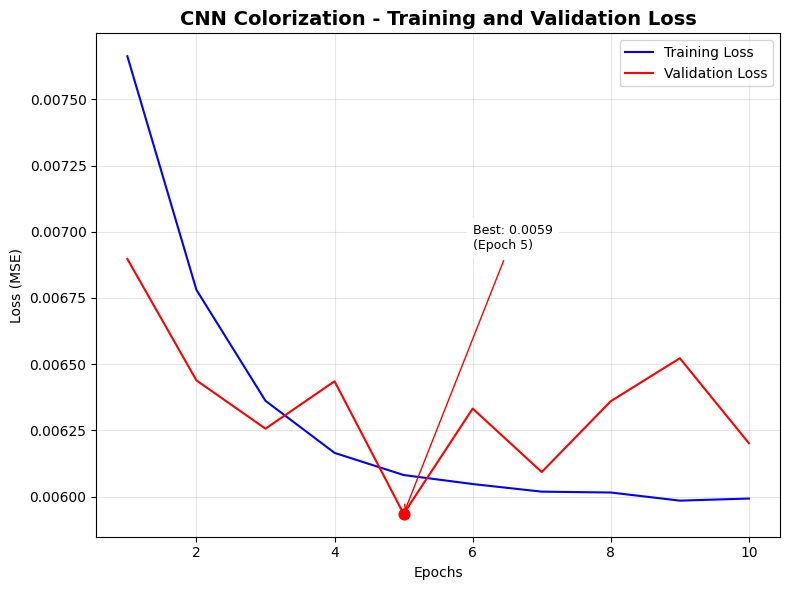

 CNN Colorization Summary
Best Validation Loss: 0.0059 at Epoch 5
Initial Train Loss: 0.0077
Final Train Loss:   0.0060



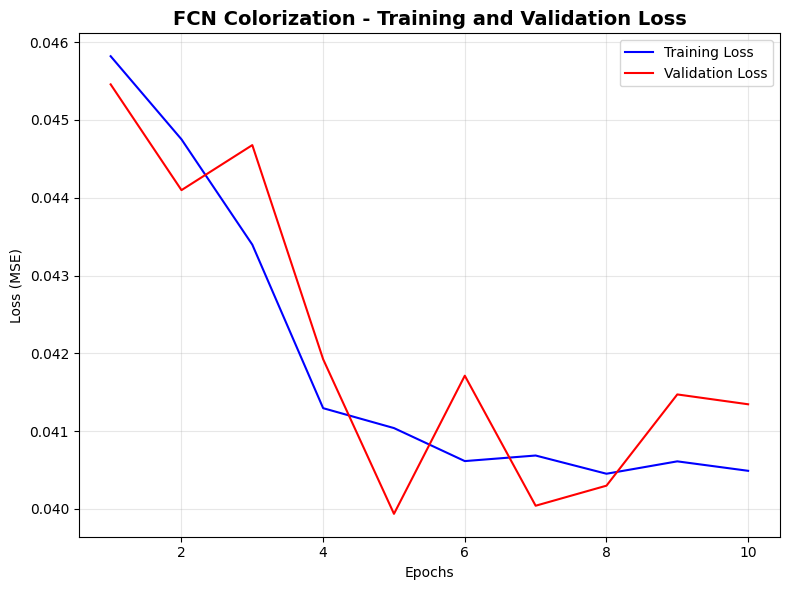

FCN Colorization Summary
Initial Train Loss: 0.0458
Final Train Loss:   0.0405
Initial Val Loss:   0.0455
Final Val Loss:     0.0413



In [13]:
def plot_losses_cnn(train_losses, val_losses, model_name="CNN Model"):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses, 'r-', label='Validation Loss')
    plt.title(f"{model_name} - Training and Validation Loss", fontsize=14, fontweight='bold')
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True, alpha=0.3)

    best_epoch = val_losses.index(min(val_losses)) + 1
    best_val = min(val_losses)
    plt.scatter(best_epoch, best_val, color='red', s=60, label='Best Val Loss')
    plt.annotate(f'Best: {best_val:.4f}\n(Epoch {best_epoch})',
                 xy=(best_epoch, best_val),
                 xytext=(best_epoch + 1, best_val + 0.001),
                 arrowprops=dict(arrowstyle='->', color='red'),
                 fontsize=9, backgroundcolor='white')

    plt.tight_layout()
    plt.show()

    print(f" {model_name} Summary")
    print(f"Best Validation Loss: {best_val:.4f} at Epoch {best_epoch}")
    print(f"Initial Train Loss: {train_losses[0]:.4f}")
    print(f"Final Train Loss:   {train_losses[-1]:.4f}\n")


def plot_losses_fcn(train_losses_fcn, val_losses_fcn, model_name="FCN Model"):
    epochs = range(1, len(train_losses_fcn) + 1)

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_losses_fcn, 'b-', label='Training Loss')
    plt.plot(epochs, val_losses_fcn, 'r-', label='Validation Loss')
    plt.title(f"{model_name} - Training and Validation Loss", fontsize=14, fontweight='bold')
    plt.xlabel("Epochs")
    plt.ylabel("Loss (MSE)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"{model_name} Summary")
    print(f"Initial Train Loss: {train_losses_fcn[0]:.4f}")
    print(f"Final Train Loss:   {train_losses_fcn[-1]:.4f}")
    print(f"Initial Val Loss:   {val_losses_fcn[0]:.4f}")
    print(f"Final Val Loss:     {val_losses_fcn[-1]:.4f}\n")


plot_losses_cnn(train_losses, val_losses, model_name="CNN Colorization")
plot_losses_fcn(train_losses_fcn, val_losses_fcn, model_name="FCN Colorization")


> **Answer:**

The CNN model performed much better than the FCN model.

**CNN Model:**
The CNN model successfully converged, with both training and validation losses decreasing steadily across epochs. The small gap between the two curves indicates good generalization and minimal overfitting. The best validation loss (0.0059 at epoch 5) confirms that the model effectively learned meaningful color features.

**FCN Model:**
The FCN model also converged, as both training and validation losses show a general downward trend. Although there are slight fluctuations in the validation loss, they are within normal range due to batch variability. However, compared to the CNN, the FCN achieved higher overall loss values (around 0.041), indicating weaker performance.

## **7.2 Running Inference on the Image Colorization Models**

Pass test images through both the **CNN-based model** and the **Fully Connected Network (FCN) model**. Compute the test losses for both models to quantify performance.

```python
def test_model()
  raise NotImplementedError
```

In [14]:
model_cnn.load_state_dict(torch.load("best_colorization_model.pth", map_location=device))
fcn_model.load_state_dict(torch.load("best_fcn_colorization_model.pth", map_location=device))

model_cnn.eval()
fcn_model.eval()

def evaluate(model, dataloader, name):
    total_loss = 0.0
    with torch.no_grad():
        for gray, rgb in dataloader:
            gray, rgb = gray.to(device), rgb.to(device)
            pred = model(gray)
            loss = criterion(pred, rgb)
            total_loss += loss.item() * gray.size(0)
    avg_loss = total_loss / len(dataloader.dataset)
    print(f"{name} Test Loss: {avg_loss:.6f}")
    return avg_loss


print("Running inference on test set...\n")
cnn_test_loss = evaluate(model_cnn, test_loader, "CNN Model")
fcn_test_loss = evaluate(fcn_model, test_loader, "FCN Model")

print("\nFinal Test Performance Comparison:")
print(f"CNN Test Loss: {cnn_test_loss:.6f}")
print(f"FCN Test Loss: {fcn_test_loss:.6f}")

if cnn_test_loss < fcn_test_loss:
    print(f"CNN performed better by {(fcn_test_loss - cnn_test_loss) / fcn_test_loss * 100:.2f}%")
else:
    print(f" FCN performed better by {(cnn_test_loss - fcn_test_loss) / cnn_test_loss * 100:.2f}%")

Running inference on test set...

CNN Model Test Loss: 0.005906
FCN Model Test Loss: 0.039431

Final Test Performance Comparison:
CNN Test Loss: 0.005906
FCN Test Loss: 0.039431
CNN performed better by 85.02%


## **8.1 Comparing Test Results**

Select **two different test images** and generate comparison plots.
   - For each test image, create a **2-row, 3-column layout**:
     - **Row 1 (CNN Model)**:  
       - **Grayscale Input**
       - **CNN Colorized Prediction**
       - **Ground Truth RGB Image**
     - **Row 2 (FCN Model)**:  
       - **Grayscale Input**
       - **FCN Colorized Prediction**
       - **Ground Truth RGB Image**

> **Display the loss value below each predicted image.**

```python
def plot_predictions():
  raise NotImplementedError
```

In [15]:
def plot_predictions(model_cnn, fcn_model, test_loader, device, criterion, num_images=2):
    model_cnn.eval()
    fcn_model.eval()

    images_shown = 0
    with torch.no_grad():
        for gray, rgb in test_loader:
            gray, rgb = gray.to(device), rgb.to(device)


            cnn_pred = model_cnn(gray)
            cnn_loss = criterion(cnn_pred, rgb).item()


            fcn_pred = fcn_model(gray)
            fcn_loss = criterion(fcn_pred, rgb).item()

            # Convert tensors to numpy for visualization
            gray_np = gray[0].cpu().squeeze().numpy()
            cnn_np = cnn_pred[0].cpu().permute(1, 2, 0).numpy()
            fcn_np = fcn_pred[0].cpu().permute(1, 2, 0).numpy()
            rgb_np = rgb[0].cpu().permute(1, 2, 0).numpy()

            # Clip to [0,1] range for safe plotting
            cnn_np = cnn_np.clip(0, 1)
            fcn_np = fcn_np.clip(0, 1)
            rgb_np = rgb_np.clip(0, 1)

            # Create 2x3 figure layout
            fig, axes = plt.subplots(2, 3, figsize=(10, 6))
            fig.suptitle(f"Test Image #{images_shown + 1}", fontsize=14)


            axes[0, 0].imshow(gray_np, cmap='gray')
            axes[0, 0].set_title("Grayscale Input")
            axes[0, 1].imshow(cnn_np)
            axes[0, 1].set_title(f"CNN Prediction\nLoss: {cnn_loss:.4f}")
            axes[0, 2].imshow(rgb_np)
            axes[0, 2].set_title("Ground Truth")


            axes[1, 0].imshow(gray_np, cmap='gray')
            axes[1, 0].set_title("Grayscale Input")
            axes[1, 1].imshow(fcn_np)
            axes[1, 1].set_title(f"FCN Prediction\nLoss: {fcn_loss:.4f}")
            axes[1, 2].imshow(rgb_np)
            axes[1, 2].set_title("Ground Truth")


            for ax_row in axes:
                for ax in ax_row:
                    ax.axis('off')

            plt.tight_layout()
            plt.show()

            images_shown += 1
            if images_shown >= num_images:
                break


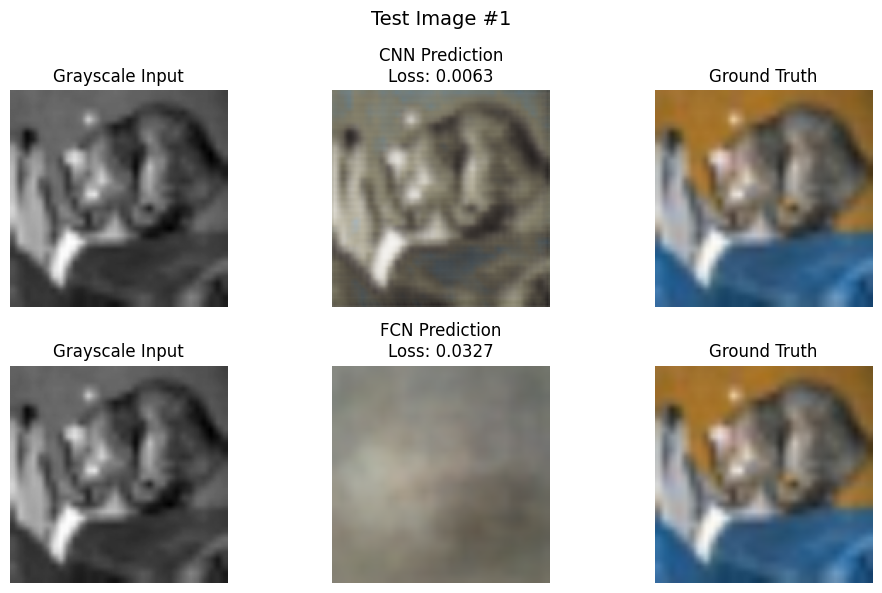

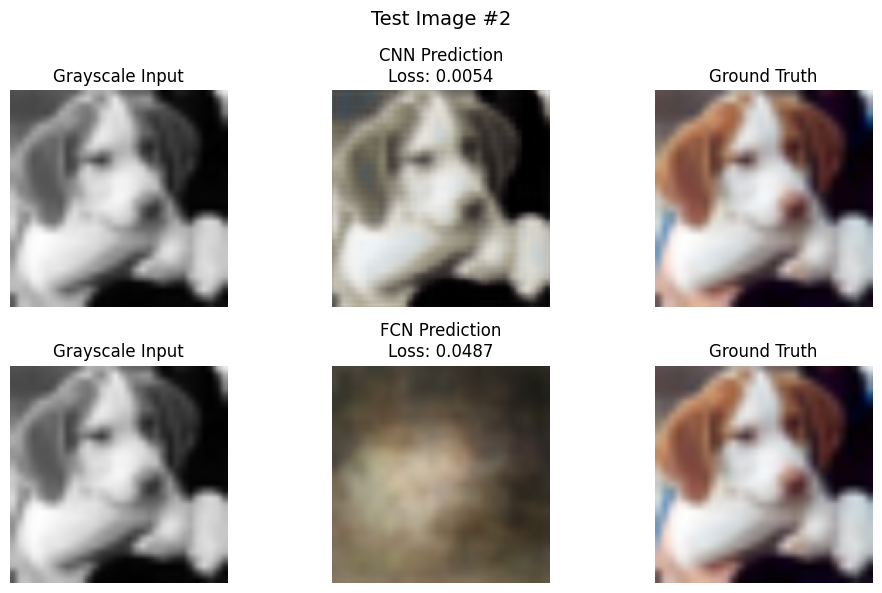

In [16]:
plot_predictions(model_cnn, fcn_model, test_loader, device, criterion, num_images=2)


## **8.2 Explaining the Difference in Performance**  

Examine the differences in both the predicted test images and the computed test losses, providing reasoning for the performance variations between the two models. Provide explanations on how these architectural differences impact both qualitative (visual) and quantitative (loss-based) performance.

**Answer:**

The CNN model performs much better than the FCN model in both training and validation.
For example, in the test image 2:

**CNN Losses:** The training and validation losses are very low (around 0.006), which means the CNN learned to predict colors accurately.

**FCN Losses:** The losses stay higher (around 0.048), showing the FCN had more difficulty learning the color relationships.

Visually, the CNN predictions are clear and close to the real colored image, while the FCN predictions look blurry and have random colors.


## **9.1 Visualizing Feature Maps in the Convolutional Neural Network**

Your goal is to **visualize the feature maps** inside your trained convolutional neural network (CNN). Feature maps show how the network transforms an input image layer by layer.

1. **Create a Hook Function:**  
   - Define a function that will store the feature maps from a given layer during a forward pass.  
2. **Register Hooks to Convolutional Layers:**  
   - Attach this function to **all convolutional layers** in your CNN model to capture their outputs.  
3. **Pass a Sample Image Through the Model:**  
   - Select a grayscale image from the test dataset and feed it into the trained CNN.  
4. **Visualize the Feature Maps:**  
   - For each convolutional layer, **plot its feature maps** (at most **10 feature maps per layer**; if a layer has fewer, visualize all of them).  
   - Include the **layer name** in each plot for clarity.

[Hook Functions](https://pytorch.org/docs/stable/generated/torch.Tensor.register_hook.html)

In [17]:
def get_feature_maps(model, input_image, device):
    feature_maps = {}

    def hook_fn(module, input, output):
        feature_maps[module] = output.detach().cpu()

    hooks = []
    for name, layer in model.named_modules():
        if isinstance(layer, torch.nn.Conv2d):
            hooks.append(layer.register_forward_hook(hook_fn))

    model.eval()
    with torch.no_grad():
        _ = model(input_image.to(device))

    for h in hooks:
        h.remove()

    return feature_maps

def visualize_feature_maps(model, test_loader, device, max_features=10):

    gray, _ = next(iter(test_loader))
    gray = gray[0].unsqueeze(0).to(device)  # (1, 1, H, W)

    feature_maps = get_feature_maps(model, gray, device)

    # Plot results layer by layer
    for i, (layer, fmap) in enumerate(feature_maps.items()):
        fmap = fmap.squeeze(0)
        num_features = min(max_features, fmap.shape[0])

        fig, axes = plt.subplots(1, num_features, figsize=(15, 3))
        fig.suptitle(f"Feature Maps from Layer: {layer.__class__.__name__} ({i+1})", fontsize=14)

        for j in range(num_features):
            ax = axes[j] if num_features > 1 else axes
            ax.imshow(fmap[j].numpy(), cmap='viridis')
            ax.axis('off')
            ax.set_title(f"Map {j+1}")

        plt.tight_layout()
        plt.show()


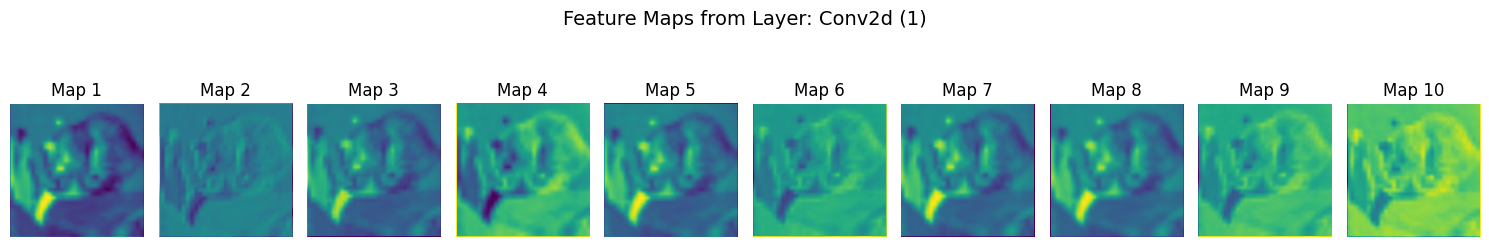

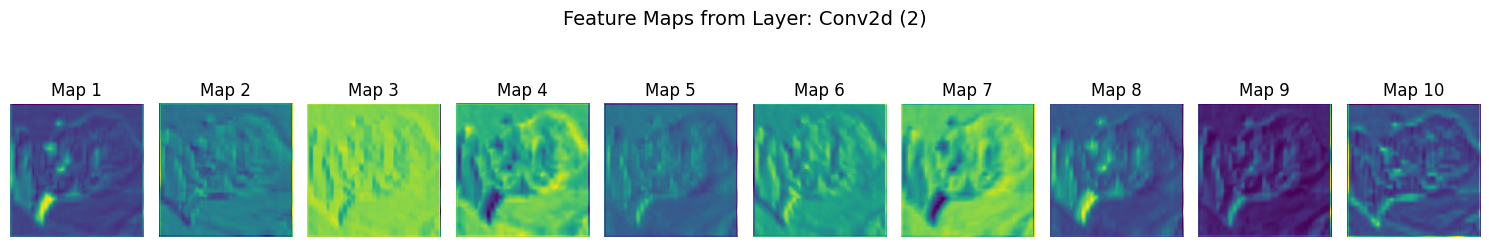

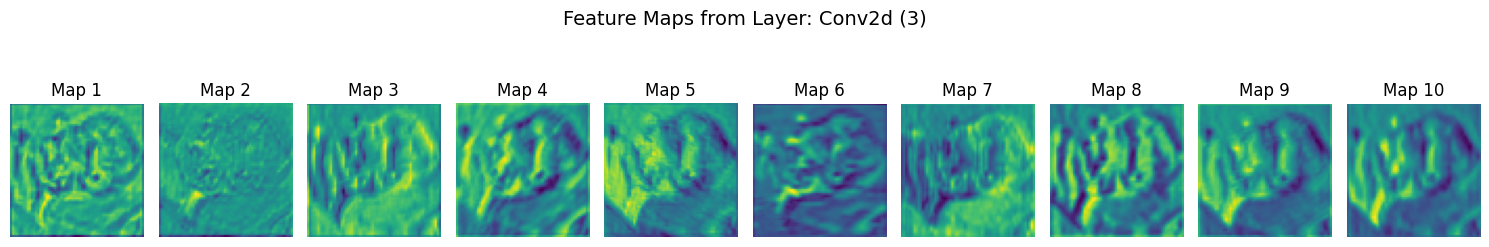

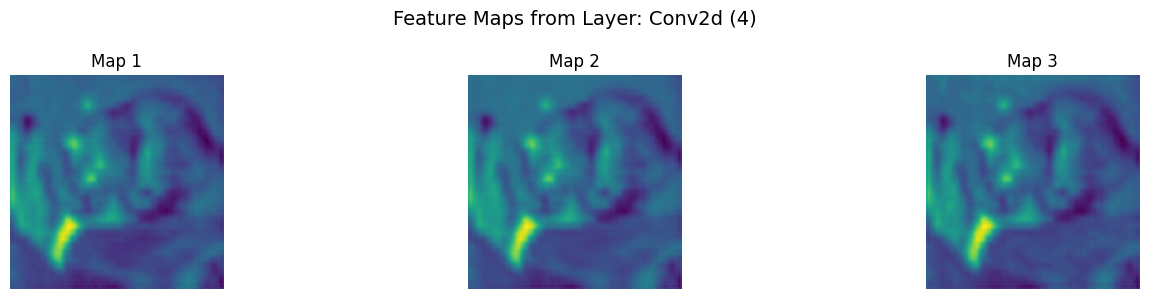

In [18]:
visualize_feature_maps(model_cnn, test_loader, device)


## **9.2 Visualizing Weights in the Fully Connected Network**  

In this task, you will explore what the first layer of your **fully connected neural network (FCN)** learns when colorizing grayscale images. Since the first linear layer directly maps grayscale pixels to hidden features, we can **reshape and visualize its weights** to understand what patterns the model is detecting.

1. **Extract the weights** of the first fully connected layer (`e.g. fc1`) from the trained linear model.  
2. **Select a few neurons** (e.g., 5-10) and reshape their weights into $32 \times 32$ images.  
3. **Plot these weights as grayscale images** using Matplotlib with a chosen colormap.

Each neuron in `e.g. fc1` has **1024 weights** (since $ 32 \times 32 = 1024 $), meaning **each neuron "sees" the entire grayscale image**. By reshaping these **1024 weights** back into $ 32 \times 32 $, we get an image representation of **what each neuron is learning**. If the model has learned useful features, you should see structured patterns, like **edges or textures**.

[The `weight` variable](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

In [21]:
def visualize_fcn_weights(fcn_model, img_size=(128, 128), num_neurons=8):

    first_layer = fcn_model.model[0]
    weights = first_layer.weight.data.cpu().numpy()

    num_neurons = min(num_neurons, weights.shape[0])
    selected_weights = weights[:num_neurons]

    plt.figure(figsize=(15, 4))
    for i in range(num_neurons):
        w_img = selected_weights[i].reshape(img_size)
        plt.subplot(1, num_neurons, i + 1)
        plt.imshow(np.abs(w_img), cmap='viridis')
        plt.title(f'Neuron {i+1}')
        plt.axis('off')

    plt.suptitle('Learned Weights from FCN First Layer (model[0])', fontsize=14)
    plt.tight_layout()
    plt.show()

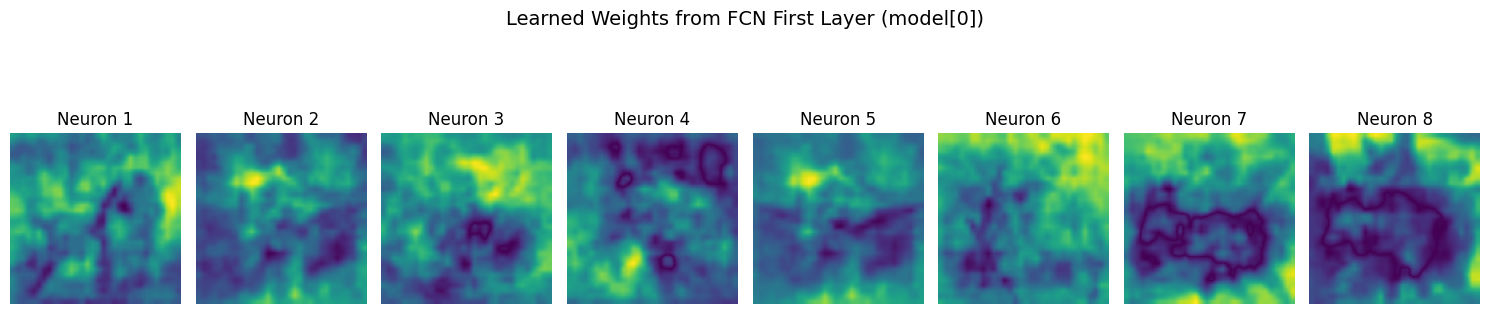

In [22]:
visualize_fcn_weights(fcn_model, img_size=(128, 128), num_neurons=8)


Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [ ]:
# @title ⏰ Time Left Until Submission ⏰
# %%capture flowchart_output
# HIDDEN CELL

from datetime import datetime, timedelta

deadline = datetime(2025, 10, 21, 23, 59, 0)

def time_until_deadline():
    now = datetime.utcnow()
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())